In [5]:
print("All OK")

All OK


In [6]:
from dotenv import load_dotenv
import os
load_dotenv()

True

In [7]:
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

In [8]:
if not GOOGLE_API_KEY:
    raise ValueError("GOOGLE_API_KEY is not set in the environment variables.")


In [9]:
from langchain_google_genai import ChatGoogleGenerativeAI

chat_llm = ChatGoogleGenerativeAI(model="gemini-3-flash-preview")

In [10]:
chat_llm.invoke("hello, how are you?")

AIMessage(content=[{'type': 'text', 'text': "Hello! I'm doing well, thank you for asking. How are you today? Is there anything I can help you with?", 'extras': {'signature': 'EpgDCpUDAb4+9vs7EHvtTzZMpZXlWB5jXAnKMY4dxvnTNqqORrbkUSPr8CK/3eWiXYx6pQrqqx1POL2+AbKummDelTWUBhNtoxEWpcOVlm7pdZmguZJK1JXj1Gwo2iTWjpS1FV0hYeT2ULvUu+tDJ7v3DoFCk8NDQa1PH4IUNZc8rT3tg27JcthSklVj9Lb06LiFn1rK/BKcPojLcQZgDH1SHn6CY763Hk/OSLkftazowXKwSyt4YslmjCmi0pXcAcSR4ijnajvdIxJ4bNHgOx9WkAWbOxCBa4Un/ArMc9fnFrUJRPrqNJiGAVMDBU9yXfU3IRC2Ee3OkKhvIp4aVCrYOq4Qx3Paa51tfHDzJ3SWZubeHCrwz6lFPtS5X9SNpl+Szb8x7pmf/zvCcdB+Eob1VRRZL2e7OVQCemmwzalpyBadyQ6VlX+cZYZdAsDQn131VQ7+MQj6BBQ96oTPDyakWBlw/4D9TAyQb1GYcPXDnhqCh8bW+9XzbH6R99NmdRHz2YWpa9y+5FhDF/fvqjuD4P/kZRyy+2f3'}}], additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-3-flash-preview', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c95c4-aa60-7fa0-8574-cbea00f8f2cf-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'

In [11]:
from typing_extensions import Annotated,TypedDict
import operator

In [12]:
from langchain_core.messages import AnyMessage,HumanMessage,AIMessage

In [13]:
class GraphState(TypedDict):
    messages:Annotated[list[AnyMessage],operator.add]
    

In [14]:
def llm_call(state:GraphState) -> dict:
  """Call the LLM using conversation messages and append AI response"""
  response = chat_llm.invoke(state["messages"])
  return {
    "messages": [response]
  }

In [15]:
def token_counter(state: GraphState) -> dict:
  """Count tokens(simple word count) in the last AI message"""
  last_msg = state["messages"][-1]
  text =str(last_msg.content)
  token_number = len(text.split())
  summary = f"Total token number in the generated answer (word count) is {token_number}."
  return {
    "messages": [AIMessage(content=summary)]
  }

In [16]:
from langgraph.graph import StateGraph

In [17]:
builder = StateGraph(GraphState)
builder.add_node(llm_call)
builder.add_node(token_counter)

In [18]:
builder.set_entry_point("llm_call")
builder.add_edge("llm_call","token_counter")
builder.set_finish_point("token_counter")

In [19]:
app = builder.compile()

In [20]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'llm_call': Node(id='llm_call', name='llm_call', data=llm_call(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'token_counter': Node(id='token_counter', name='token_counter', data=token_counter(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='llm_call', data=None, conditional=False), Edge(source='llm_call', target='token_counter', data=None, conditional=False), Edge(source='token_counter', target='__end__', data=None, conditional=False)])

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'llm_call': Node(id='llm_call', name='llm_call', data=llm_call(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'token_counter': Node(id='token_counter', name='token_counter', data=token_counter(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='llm_call', data=None, conditional=False), Edge(source='llm_call', target='token_counter', data=None, conditional=False), Edge(source='token_counter', target='__end__', data=None, conditional=False)])

In [21]:
from IPython.display import Image,display

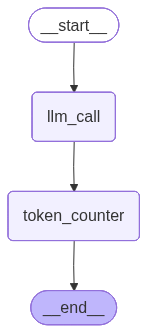

In [22]:
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
result = app.invoke({
  "messages":[HumanMessage(content="What is the capital of France?")]
})

In [24]:
result

{'messages': [HumanMessage(content='What is the capital of France?', additional_kwargs={}, response_metadata={}),
  AIMessage(content=[{'type': 'text', 'text': 'The capital of France is **Paris**.', 'extras': {'signature': 'EtcBCtQBAb4+9vueTRd7jjBYdi2oStaeHnIrPWDfx3BkVaDoPFF2GJsiX63iVBAiPIjbdLbed+Cka1TxGe7UVT1GfxpOiCvZ6+cJgpLeYneMLDO5/rXptpUyUvpVdoGQihErrcmggCNBWXrGpV6w/ONV7Lc2zY33bQfAgTgVhhZ/3dwTcHGdTrzoccijKKdxf3ielJmu+4mu4E7OsqwkVO/I27tZdH4g58Xj3Hfh8XzI/fk96ux5TejKOq4GfMytXW9pJ/sRy+OnOtuLXjfvGCKD8FPdi0d39XA='}}], additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-3-flash-preview', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c95c4-b570-7082-a6f2-02f59ab2bd49-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 8, 'output_tokens': 44, 'total_tokens': 52, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 36}}),
  AIMessage(content='Total token number in the generated answ

In [25]:
for msg in result["messages"]:
  print(type(msg).__name__,":",msg.content)

HumanMessage : What is the capital of France?
AIMessage : [{'type': 'text', 'text': 'The capital of France is **Paris**.', 'extras': {'signature': 'EtcBCtQBAb4+9vueTRd7jjBYdi2oStaeHnIrPWDfx3BkVaDoPFF2GJsiX63iVBAiPIjbdLbed+Cka1TxGe7UVT1GfxpOiCvZ6+cJgpLeYneMLDO5/rXptpUyUvpVdoGQihErrcmggCNBWXrGpV6w/ONV7Lc2zY33bQfAgTgVhhZ/3dwTcHGdTrzoccijKKdxf3ielJmu+4mu4E7OsqwkVO/I27tZdH4g58Xj3Hfh8XzI/fk96ux5TejKOq4GfMytXW9pJ/sRy+OnOtuLXjfvGCKD8FPdi0d39XA='}}]
AIMessage : Total token number in the generated answer (word count) is 12.


In [26]:
chat_llm

ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, google_api_key=SecretStr('**********'), model='gemini-3-flash-preview', temperature=1.0, client=<google.genai.client.Client object at 0x0000019E24C41C10>, default_metadata=(), model_kwargs={})

In [27]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

In [28]:
api_wrapper = WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max=500)

In [29]:
wiki_tool = WikipediaQueryRun(api_wrapper=api_wrapper)

In [30]:
wiki_tool.run({"query":"Generative AI"})

'Page: Generative artificial intelligence\nSummary: Generative artificial intelligence, also known as generative AI or GenAI, is a subfield of artificial intelligence that uses generative models to generate text, images, videos, audio, software code or other forms of data. These models learn the underlying patterns and structures of their training data, and use them to generate new data in response to input, which often takes the form of natural language prompts.\nThe prevalence of generative AI to'

'Page: Generative artificial intelligence\nSummary: Generative artificial intelligence, also known as generative AI or GenAI, is a subfield of artificial intelligence that uses generative models to generate text, images, videos, audio, software code or other forms of data. These models learn the underlying patterns and structures of their training data, and use them to generate new data in response to input, which often takes the form of natural language prompts.\nThe prevalence of generative AI to'

In [31]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")

In [32]:
if not TAVILY_API_KEY:
    raise ValueError("TAVILY_API_KEY is not set in the environment variables.")

In [33]:
tool = TavilySearchResults(tavily_api_key=TAVILY_API_KEY)

C:\Users\nmanjappa\AppData\Local\Temp\ipykernel_24156\709498164.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tool = TavilySearchResults(tavily_api_key=TAVILY_API_KEY)


In [34]:
tool.invoke({"query":"How is the job market for senior AI engineers in the UK?"})

[{'title': 'UK AI & Data Science Market Insights: Hiring, Salary, and Retention',
  'url': 'https://www.linkedin.com/posts/jamiewilkins_its-hotting-up-out-there-here-are-a-few-activity-7379434137969016832-iVLl',
  'content': "It's hotting up out there. Here are a few insights I’m seeing in the UK AI & Data Science market right now: - Average tech hiring cycles are 6 to 8 weeks, but for senior AI/ML engineers they often stretch to 3 to 4 months. - More than 70% of individuals are passive or inactive, making direct advertising far less effective. - Compensation structures are shifting rapidly across engineering, product, and leadership roles. Companies that move first are being rewarded. Salary benchmarks (UK): - Median Data Scientist salary is around £71k. - Senior AI/ML engineers often command £90k to £115k+, with individuals in certain industries expecting significantly more. - Genuine LLM experts typically command £125k to £200k+, with some earning even more. - Leaders in this space 

In [35]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

In [36]:
search.invoke("what is the price of iPhone 17 in UK")

Impersonate 'safari_17.5' does not exist, using 'random'


'Prices for monthly contract deals could also increase but the good news for shoppers is that many UK providers offer cheap options even on the more ... Canadian residents face a minor bump in the price of the iPhone 17 , with the ... In the UK , the iPhone 17 is priced at approximately £899 ($1,120). In the UK , Apple lists iPhone 17 “from £799 ,” iPhone Air “from £999 ,” and iPhone 17 Pro “from £1,099 .” VAT is included there, unlike ... Here are the lowest prices we could find for the Apple iPhone 17 Pro at our partner stores. ... The listed prices do not include any sale taxes and ... Here are the lowest prices we could find for the Apple iPhone 17 at our partner stores. ... The listed prices do not include any sale taxes and ...'

"The iPhone 17 UK price is set higher in many models compared to the iPhone 16 generation, driven by enhancements in camera, display, build, and internal hardware. SIM-free prices start at ~£799 for the base model, rising steeply for Pro, Pro Max, and top storage variants. Contracts spread out the cost, but usually with a higher total outlay. Ahead of the iPhone 17 series' official launch on September 19, we've rounded up how much each handset will cost. Compare the best iPhone 17 in one place. Find offers from top retailers, check prices , and save money on an iPhone 17 today. The iPhone 17 , iPhone 17 Pro, iPhone 17 Pro Max and Apple 's all-new iPhone Air are now available in the UK , and mobile networks and retailers have rolled out their best offers. How much is the new iPhone 17 in the UK ? At the time of launch, the price for the iPhone 17 starts at £799 SIM-free for the 256GB variant and rises to £999 for the 512GB version."

In [37]:
from langchain_community.tools import YouTubeSearchTool

In [38]:
tool = YouTubeSearchTool()
tool.name

'youtube_search'

In [39]:
tool.description

'search for youtube videos associated with a person. the input to this tool should be a comma separated list, the first part contains a person name and the second a number that is the maximum number of video results to return aka num_results. the second part is optional'

In [40]:
tool.run("SOic")

"['https://www.youtube.com/watch?v=-N_-AF-Srb4&pp=ygUEU09pY9IHCQmiCgGHKiGM7w%3D%3D', 'https://www.youtube.com/watch?v=C-y9iAKAUzw&pp=ygUEU09pY9IHCQmiCgGHKiGM7w%3D%3D']"

In [41]:

def multiply(a:int,b:int) -> int:
  return a*b

In [42]:
multiply(10,20)

200

In [43]:
from langchain.tools import tool

In [44]:
@tool
def multiplier(a:int,b:int) -> int:
  """This tool is for the multiplication"""
  return a*b


In [45]:
multiplier.invoke({"a":10,"b":30})

300

In [46]:
multiplier.args

{'a': {'title': 'A', 'type': 'integer'},
 'b': {'title': 'B', 'type': 'integer'}}

In [47]:
@tool
def get_word_length(word:str) -> int:
  """This tool is for getting the number of words in a sentence"""
  return len(word)

In [48]:
get_word_length.invoke("hello world")

11

In [49]:
import yfinance as yf


In [50]:
@tool
def get_stock_price(ticker:str)->str:
  """This is a tool for getting stock price using yfinance"""
  try:
    stock = yf.Ticker(ticker)
    data = stock.history(period="1d")
    if data.empty:
      return f"No data found for ticker {ticker}. Please check the symbol"
    latest_close = data["Close"].iloc[-1]

    # Detect currency
    currency = stock.info.get("currency","")
    symbol_map = {
      "INR":"₹",
      "USD":"$",
      "GBp":"£"
    }

    symbol = symbol_map.get(currency,"")
    currency_text = currency if currency else ""
    if symbol:
      return f"The last closing price of {ticker.upper()} was {symbol}{latest_close:.2f}"
    else:
      return f"The last closing price of {ticker.upper()} was {latest_close:.2f} {currency_text}"
  
  except Exception as e:
    return f"An error occurred while fetching stock data: {str(e)}"

In [51]:
get_stock_price.invoke("RELIANCE.NS")

'The last closing price of RELIANCE.NS was ₹1398.50'

In [52]:
get_stock_price.invoke("MANH")

'The last closing price of MANH was $133.87'

In [53]:
get_stock_price.invoke("LLOY.L")

'The last closing price of LLOY.L was £104.50'

In [54]:
get_stock_price.invoke("^NSEI")

'The last closing price of ^NSEI was ₹25482.50'

In [55]:
tools = [get_stock_price,get_word_length,multiplier,wiki_tool]

In [56]:
llm_with_tools = chat_llm.bind_tools(tools)

In [57]:
result=llm_with_tools.invoke("What is the stock price of TCS.NS?")

In [58]:
result.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'TCS.NS'},
  'id': 'e9406775-e17d-443c-b50f-21a4ebb23ab2',
  'type': 'tool_call'}]

In [59]:
result = llm_with_tools.invoke("how many words are there in the sentence'hello world, this is test sentence'?")

In [60]:
result.tool_calls

[{'name': 'get_word_length',
  'args': {'word': 'hello world, this is test sentence'},
  'id': '50ce1995-e887-43cd-b18e-f2ebb1f7a2db',
  'type': 'tool_call'}]

In [61]:
result = llm_with_tools.invoke("can you multiply 2 and 20?")

In [62]:
result.tool_calls

[{'name': 'multiplier',
  'args': {'a': 2, 'b': 20},
  'id': '2b02525f-af2b-4144-a610-a5705c7402d4',
  'type': 'tool_call'}]

In [63]:
result = llm_with_tools.invoke("hi, how are you?")

In [64]:
result.content

[{'type': 'text',
  'text': "I'm doing well, thank you for asking! How can I help you today?",
  'extras': {'signature': 'EscBCsQBAb4+9vuPT8VAIKTL4tlYSsGk/Bl0KPoCSbBkYFI4IjjQUncPILideN2yoIBFaraDu8MJIJBA7OWTp6a/A/clZx24f1oSSpjUbXzRSqBzb1OOvwV4t469xc5+KhykTA73iuY+18+s4maNZttITxkp64V/4Cv8G3MbVdomWA6p79U+He7M7YHtTqQulazplZ38aENTlQo3C3iHqin/4JjZL/mn3yZKg37tsHEHOzfbIUBqUlBnMqbqXuIoNceW/5nJQYob3g=='}}]

In [65]:
result = llm_with_tools.invoke("What was in the latest Indian budget report in 2025 as per wikipedia?")


In [66]:
result.tool_calls



[{'name': 'wikipedia',
  'args': {'query': '2025 Union budget of India'},
  'id': '9f535198-29f0-4d97-a3ed-9f766bd013fd',
  'type': 'tool_call'}]

In [67]:
from langchain_core.messages import HumanMessage,SystemMessage
from langgraph.graph import MessagesState,StateGraph,END,START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [81]:
system_prompt = SystemMessage(content="You are a helpful assistant that can use tools to answer questions")

In [84]:
def function_1(state:MessagesState):
  user_question = state["messages"]
  input_question  = [system_prompt] + user_question
  response = llm_with_tools.invoke(input_question)
  return {
    "messages":[response]
  }

In [85]:
function_2 = ToolNode(tools)

In [87]:
workflow = StateGraph(MessagesState)

In [88]:
workflow.add_node("llm",function_1)

In [89]:
workflow.add_node("tools",function_2)


In [90]:
workflow.add_edge(START, "llm")
workflow.add_conditional_edges("llm",tools_condition)



In [91]:
workflow.add_edge("tools","llm")

In [92]:
app = workflow.compile()

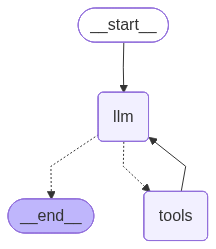

In [93]:
from IPython.display import Image,display
display(Image(app.get_graph(xray=True).draw_mermaid_png()))

In [102]:
result = app.invoke({
  "messages":[HumanMessage(content="what is the stock price of TCS.NS?")]
})

In [103]:
for m in result['messages']:
  try:
    m.pretty_print()
  except AttributeError:
    print(f"{type(m).__name__}: {m.content}")

================================ Human Message =================================

what is the stock price of TCS.NS?
================================== Ai Message ==================================

[]
Tool Calls:
  get_stock_price (c923b8ab-8a13-4330-80d9-cca8e91b42fe)
 Call ID: c923b8ab-8a13-4330-80d9-cca8e91b42fe
  Args:
    ticker: TCS.NS
================================= Tool Message =================================
Name: get_stock_price

The last closing price of TCS.NS was ₹2629.30
================================== Ai Message ==================================

[{'type': 'text', 'text': 'The last closing price of TCS.NS was ₹2629.30.'}]


In [104]:
result = app.invoke({
  "messages":[HumanMessage(content="what was in the latest Indian Union Budget?")]
})

In [105]:
for m in result['messages']:
  try:
    m.pretty_print()
  except AttributeError:
    print(f"{type(m).__name__}: {m.content}")

================================ Human Message =================================

what was in the latest Indian Union Budget?
================================== Ai Message ==================================

[]
Tool Calls:
  wikipedia (7a35c6ce-fb7c-4f5f-9805-eb3b2db3b740)
 Call ID: 7a35c6ce-fb7c-4f5f-9805-eb3b2db3b740
  Args:
    query: 2024 Union Budget of India
================================= Tool Message =================================
Name: wikipedia

Page: 2024 Union budget of India
Summary: The 2024 Union Budget of India was presented by Finance Minister, Nirmala Sitharaman on 23 July 2024. This was the first budget of Narendra Modi led NDA government's third term.

Page: Union budget of India
Summary: The Union Budget of India, also known as the Annual Financial Statement under Article 112 of the Indian Constitution, is the country's annual financial plan prepared by the Ministry of Finance. It outlines the government's expected revenues, 
==================================